In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [2]:
from collections import Counter

data1 = pd.read_csv("20151219.txt", sep = "\t", header = None)
data1.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

data2 = pd.read_csv("20151220.txt", sep = "\t", header = None)
data2.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

data = data1.append(data2, ignore_index=True)

print(Counter(data["attack_flag"]))

Counter({-1: 338997, 1: 80149})


## Transform to binary

In [3]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 338997, 0: 80149})


## Drop additional features

In [4]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(419146, 24)
(419146, 21)


1    338997
0     80149
Name: attack_flag, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419146 entries, 0 to 419145
Data columns (total 18 columns):
conn len                       419146 non-null float64
service                        419146 non-null object
src bytes                      419146 non-null int64
dst bytes                      419146 non-null int64
conn numb                      419146 non-null int64
Same srv rate                  419146 non-null float64
Serror rate                    419146 non-null float64
Srv serror rate                419146 non-null float64
Dst host count                 419146 non-null int64
Dst host srv count             419146 non-null int64
Dst host same src port rate    419146 non-null float64
Dst host serror rate           419146 non-null float64
Dst host srv serror rate       419146 non-null float64
Conn state                     419146 non-null object
attack_flag                    419146 non-null int64
src port                       419146 non-null int64
dst port                 

In [6]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
419136,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,0.0,0.0,0.0,S0,1,54695,8081,tcp
419137,0.000000,other,0,0,0,0.0,0.0,0.00,1,1,0.0,1.0,1.0,S0,1,44997,21320,tcp
419138,0.485847,other,0,0,0,0.0,0.0,1.00,5,4,0.0,0.0,0.0,RSTR,1,65024,3389,tcp
419139,3.253905,other,0,0,0,0.0,0.0,0.50,1,39,1.0,1.0,1.0,S0,1,18399,25,tcp
419140,0.000000,other,0,0,0,0.0,0.0,0.67,4,4,1.0,1.0,1.0,S0,1,33863,20012,tcp
419141,0.000000,other,0,0,0,0.0,0.0,0.75,0,0,0.0,0.0,0.0,OTH,1,3,3,icmp
419142,3.135446,rdp,1726,5591,1,0.0,0.0,0.00,5,72,0.0,0.0,0.0,S1,1,62518,3389,tcp
419143,0.000000,other,0,0,0,0.0,0.0,0.60,0,2,0.0,0.0,1.0,S0,1,35137,123,udp
419144,0.000000,other,0,0,0,0.0,0.0,0.67,0,0,0.0,0.0,0.0,S0,1,42613,81,tcp
419145,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,0.0,0.0,0.0,S0,1,42346,21320,tcp


In [7]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,419146.000000,4.191460e+05,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000
mean,0.897800,2.168004e+04,364.750896,2.522923,0.357259,0.064550,0.548421,25.437657,28.919419,0.073814,0.068824,0.153320,0.808780,34004.366686,3584.727816
std,4.749450,4.708272e+06,2285.497265,5.451557,0.477454,0.244823,0.462899,41.519257,42.252740,0.259441,0.252677,0.357215,0.393262,19713.691673,10928.964687
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12375.000000,23.000000
50%,0.000091,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,38884.000000,53.000000
75%,0.721284,4.500000e+01,77.000000,3.000000,1.000000,0.000000,1.000000,73.000000,92.000000,0.000000,0.000000,0.000000,1.000000,50359.000000,1433.000000
max,1061.910079,1.696585e+09,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65507.000000


In [8]:
# removing NaNs
data = data.dropna()
data.shape

(419146, 18)

In [9]:
data["Conn state"].value_counts(dropna=False)

S0        247950
SF        104018
RSTO       26466
OTH        19608
REJ        15659
RSTRH       1853
RSTOS0      1514
SHR         1195
RSTR         778
S1           103
SH             2
Name: Conn state, dtype: int64

In [10]:
data["service"].value_counts(dropna=False)

other      259775
dns        102883
ssh         29769
sip         20915
rdp          3640
snmp         1096
smtp          999
dhcp           43
http           21
ssl             3
dns,sip         2
Name: service, dtype: int64

In [11]:
data["proto"].value_counts(dropna=False)

tcp     256581
udp     153868
icmp      8697
Name: proto, dtype: int64

# a bit of feature engineering

## port numbers classification

In [12]:
t1 = 1023  # well-known port numbers
t2 = 49151 # registered ports
t3 = 65535 # client ports

def wk(data_row):
    if (data_row["src port"] <= t1): 
        value = 1
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def reg(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 1
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def cli(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 1
    return value

data["well-known src pool"] = data.apply(wk, axis=1)
data["registered src pool"] = data.apply(reg, axis=1)
data["cli src pool"] = data.apply(cli, axis=1)

In [13]:
print(Counter(data["well-known src pool"]))
print(Counter(data["registered src pool"]))
print(Counter(data["cli src pool"]))

Counter({0: 406741, 1: 12405})
Counter({1: 291278, 0: 127868})
Counter({0: 303683, 1: 115463})


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419146 entries, 0 to 419145
Data columns (total 21 columns):
conn len                       419146 non-null float64
service                        419146 non-null object
src bytes                      419146 non-null int64
dst bytes                      419146 non-null int64
conn numb                      419146 non-null int64
Same srv rate                  419146 non-null float64
Serror rate                    419146 non-null float64
Srv serror rate                419146 non-null float64
Dst host count                 419146 non-null int64
Dst host srv count             419146 non-null int64
Dst host same src port rate    419146 non-null float64
Dst host serror rate           419146 non-null float64
Dst host srv serror rate       419146 non-null float64
Conn state                     419146 non-null object
attack_flag                    419146 non-null int64
src port                       419146 non-null int64
dst port                 

In [15]:
# data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool", "well-known dst pool", "registered dst pool", "cli dst pool"]].head(30)
data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool"]].head(30)

,src port,dst port,well-known src pool,registered src pool,cli src pool
0,40061,111,0,1,0
1,53488,80,0,0,1
2,35051,23,0,1,0
3,1408,445,0,1,0
4,55244,995,0,0,1
5,44544,995,0,1,0
6,50678,5900,0,0,1
7,35051,23,0,1,0
8,50678,5900,0,0,1
9,50678,5900,0,0,1


## Change port number info to categorical

In [16]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)
data['src port'].nunique()
data['dst port'].nunique()

thresh1 = 230
thresh2 = 230
counts1 = data['src port'].value_counts()
counts2 = data['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
data = pd.concat([data, pd.get_dummies(data["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
data = pd.concat([data, pd.get_dummies(data["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [17]:
data.shape

(419146, 267)

## Hot one encoding

In [18]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
419136,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,...,0,0,0,0,0,1,0,0,0,0
419137,0.000000,other,0,0,0,0.0,0.0,0.00,1,1,...,0,0,0,0,0,1,0,0,0,0
419138,0.485847,other,0,0,0,0.0,0.0,1.00,5,4,...,0,0,0,1,0,0,0,0,0,0
419139,3.253905,other,0,0,0,0.0,0.0,0.50,1,39,...,0,0,0,0,0,1,0,0,0,0
419140,0.000000,other,0,0,0,0.0,0.0,0.67,4,4,...,0,0,0,0,0,1,0,0,0,0
419141,0.000000,other,0,0,0,0.0,0.0,0.75,0,0,...,0,0,0,0,0,0,0,0,0,0
419142,3.135446,rdp,1726,5591,1,0.0,0.0,0.00,5,72,...,0,0,0,0,0,0,1,0,0,0
419143,0.000000,other,0,0,0,0.0,0.0,0.60,0,2,...,0,0,0,0,0,1,0,0,0,0
419144,0.000000,other,0,0,0,0.0,0.0,0.67,0,0,...,0,0,0,0,0,1,0,0,0,0
419145,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419146 entries, 0 to 419145
Columns: 292 entries, conn len to state_SHR
dtypes: float64(7), int64(9), object(5), uint8(271)
memory usage: 178.7+ MB


## Plot function definition

In [20]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [21]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

In [22]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])

train_ex = train
validate_ex = validate
test_ex = test

train = train.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
validate = validate.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
test = test.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)

train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)

y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1).astype(np.float32)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1).astype(np.float32)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1).astype(np.float32)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 54763, 0: 8109})
Counter({1: 59796, 0: 3076})
Counter({1: 224438, 0: 68964})


# Algoritms performance comparison

In [23]:
from collections import Counter

print(Counter(y_test))

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Counter({1: 54763, 0: 8109})


In [24]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred = np.ones(len(y_test)).ravel() 
else:
    y_pred = np.zeros(len(y_test)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.87102, F1-score: 0.93107, Precision: 0.87102, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 8109; FN:    0; TP: 54763



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test)

name = "logistic Regression"

Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.92776, F1-score: 0.95724, Precision: 0.98793, Recall: 0.92840, FPR: 0.07658
TN: 7488; FP: 621; FN: 3921; TP: 50842



In [26]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0)
# # learning rate [1 - default] najlepsze wyniki
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


seed = 12
num_trees = 28

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=167, max_depth=38, random_state=0)),
}


for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.97644, F1-score: 0.98647, Precision: 0.98707, Recall: 0.98587, FPR: 0.08719
TN: 7402; FP: 707; FN:  774; TP: 53989

Algorithm: DecisionTree Accuracy: 0.97463, F1-score: 0.98555, Precision: 0.97777, Recall: 0.99346, FPR: 0.15255
TN: 6872; FP: 1237; FN:  358; TP: 54405

Algorithm: NaiveBayes   Accuracy: 0.86727, F1-score: 0.91772, Precision: 0.99739, Recall: 0.84984, FPR: 0.01505
TN: 7987; FP: 122; FN: 8223; TP: 46540

Algorithm: RandomTree   Accuracy: 0.97749, F1-score: 0.98714, Precision: 0.98270, Recall: 0.99162, FPR: 0.11789
TN: 7153; FP: 956; FN:  459; TP: 54304



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomForest Accuracy: 0.98357, F1-score: 0.99064, Precision: 0.98353, Recall: 0.99785, FPR: 0.11284
TN: 7194; FP: 915; FN:  118; TP: 54645



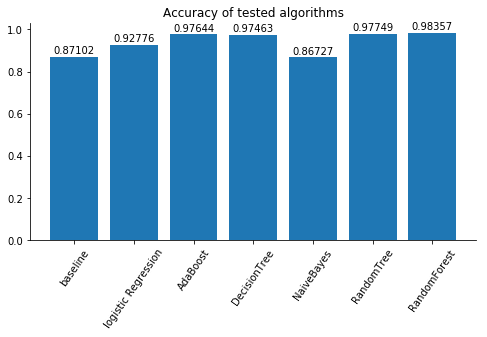

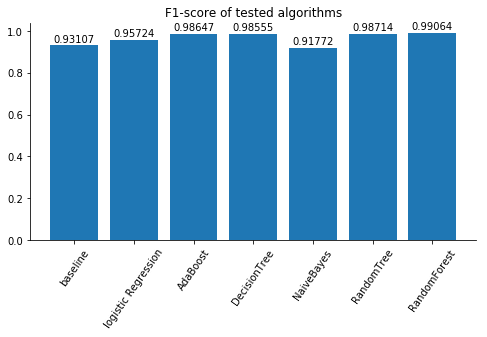

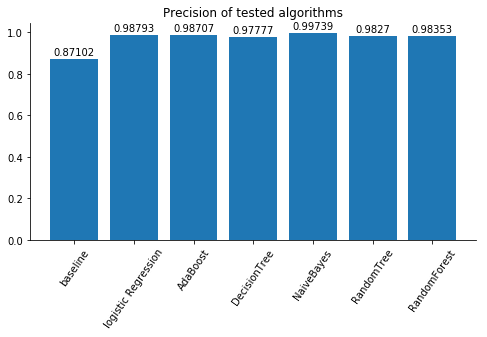

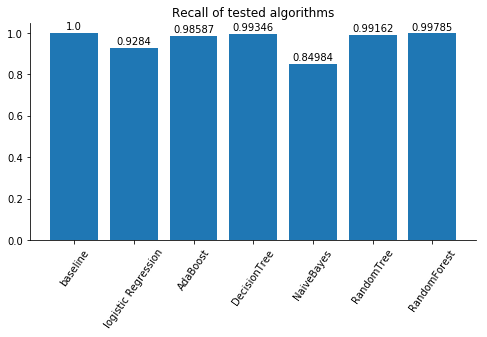

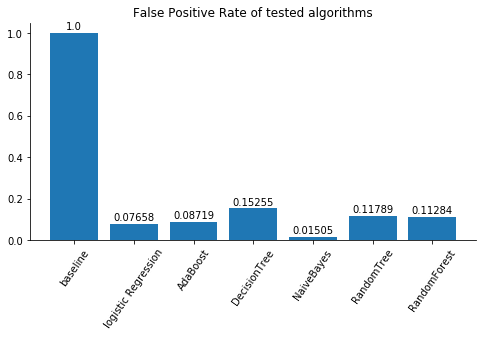

In [27]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

# Random Features for Large-Scale Kernel Machines

In [28]:
import numpy as np
import tensorflow as tf
import time

In [29]:
X_train.values.shape

(293402, 286)

In [85]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(    
    x={"features": X_train.values},    
    y=y_train,    
    batch_size=180,    
    num_epochs=None,    
    shuffle=False)

In [86]:
X_validate.shape

(62872, 286)

In [87]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_validate.values},
    y=y_validate,
    batch_size=X_validate.shape[0],
    num_epochs=1,
    shuffle=False)

In [88]:
X_test.shape

(62872, 286)

In [89]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test.values},
    y=y_test,
    batch_size=X_test.shape[0],
    num_epochs=1,
    shuffle=False)

## Using explicit kernel mappings with the linear model

In [90]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool", 
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                    "Conn state" : "Conn_state" 
                    }, inplace=True)

In [91]:
feat_column = tf.contrib.layers.real_valued_column('features', dimension=len(X_train.columns.values))

In [92]:
kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(input_dim=len(X_train.columns.values), output_dim=5000, stddev=5, name='rffm')

In [93]:
kernel_mappers = {feat_column: [kernel_mapper]}

In [94]:
! rm -r kernel_train

In [104]:
optimizer = tf.train.FtrlOptimizer(learning_rate=25, l2_regularization_strength=0.001)

In [105]:
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(
    n_classes=2,
    optimizer=optimizer,
    kernel_mappers=kernel_mappers, 
    model_dir="kernel_train")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbded319940>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'kernel_train'}


In [106]:
estimator_kernel.fit(input_fn=train_input_fn, steps=8000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8000 into kernel_train/model.ckpt.
INFO:tensorflow:loss = 0.027534327, step = 8001
INFO:tensorflow:global_step/sec: 106.858
INFO:tensorflow:loss = 0.07363486, step = 8101 (0.937 sec)
INFO:tensorflow:global_step/sec: 112.952
INFO:tensorflow:loss = 0.08952474, step = 8201 (0.885 sec)
INFO:tensorflow:global_step/sec: 111.776
INFO:tensorflow:loss = 0.11255845, step = 8301 (0.895 sec)
INFO:tensorflow:global_step/sec: 111.733
INFO:tensorflow:loss = 0.0062868157, step = 8401 (0.895 sec)
INFO:tensorflow:global_step/sec: 113.227
INFO:tensorflow:loss = 0.0061567836, step = 8501 (0.883 sec)
INFO:tensorflow:global_step/sec: 111.79
INFO:tensorflow:loss = 0.016291857, step = 8601 (0.894 sec)
INFO:tensorflow:global_step/sec: 111.56

INFO:tensorflow:loss = 0.0023178472, step = 15401 (0.900 sec)
INFO:tensorflow:global_step/sec: 113.37
INFO:tensorflow:loss = 0.0017794602, step = 15501 (0.882 sec)
INFO:tensorflow:global_step/sec: 111.258
INFO:tensorflow:loss = 0.00042068187, step = 15601 (0.899 sec)
INFO:tensorflow:global_step/sec: 113.45
INFO:tensorflow:loss = 0.001882763, step = 15701 (0.881 sec)
INFO:tensorflow:global_step/sec: 113.583
INFO:tensorflow:loss = 0.00061127753, step = 15801 (0.881 sec)
INFO:tensorflow:global_step/sec: 114.01
INFO:tensorflow:loss = 0.032584433, step = 15901 (0.877 sec)
INFO:tensorflow:Saving checkpoints for 16000 into kernel_train/model.ckpt.
INFO:tensorflow:Loss for final step: 0.032349877.


KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7fbdd1ca8a20>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=5000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x7fbdd1fcbdd8>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=286, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x7fbded319ac8>]}})

In [107]:
eval_metrics = estimator_kernel.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-05-20-21:33:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-20-21:33:15
INFO:tensorflow:Saving dict for global step 16000: accuracy = 0.9424545, accuracy/baseline_label_mean = 0.9510752, accuracy/threshold_0.500000_mean = 0.9424545, auc = 0.77466094, auc_precision_recall = 0.98568255, global_step = 16000, labels/actual_label_mean = 0.9510752, labels/prediction_mean = 0.9388537, loss = 0.32930708, precision/positive_threshold_0.500000_mean = 0.9733569, recall/positive_threshold_0.500000_mean = 0.96593416


In [108]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.9424545
accuracy/baseline_label_mean: 0.9510752
accuracy/threshold_0.500000_mean: 0.9424545
auc: 0.77466094
auc_precision_recall: 0.98568255
global_step: 16000
labels/actual_label_mean: 0.9510752
labels/prediction_mean: 0.9388537
loss: 0.32930708
precision/positive_threshold_0.500000_mean: 0.9733569
recall/positive_threshold_0.500000_mean: 0.96593416


In [109]:
correctness = []
class_id = []
pred_iterator = None

In [110]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [111]:
for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [112]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test, class_id)
F1S[name] = metrics.f1_score(y_test, class_id)
Prec[name] = metrics.precision_score(y_test, class_id)
Rec[name] = metrics.recall_score(y_test, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, class_id).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

RFFM Accuracy: 0.96032, F1-score: 0.97728, Precision: 0.97477, Recall: 0.97980, FPR: 0.17129
TN: 6720; FP: 1389; FN: 1106; TP: 53657



# Neural network part

In [49]:
import collections
import io
import math
import tensorflow as tf
from IPython import display

In [50]:
deep_numeric_feat = ["Same_srv_rate", "Serror_rate", "Srv_serror_rate", "Dst_host_count", "Dst_host_srv_count", "Dst_host_same_src_port_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "well_known_src_pool", "registered_src_pool", "cli_src_pool"]
wide_numeric_feat = ["conn_len",  "src_bytes", "dst_bytes", "conn_numb"]
categorical_feat = ["service", "Conn_state", "src_port", "dst_port", "proto"]

In [51]:
deep_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in deep_numeric_feat]
wide_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in wide_numeric_feat]

In [52]:
src_port_mod = ["src_" + s for s in data["src_port"].unique().tolist()]
src_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'src_port', src_port_mod)

dst_port_mod = ["dst_" + s for s in data["dst_port"].unique().tolist()]
dst_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'dst_port', dst_port_mod)

service = tf.feature_column.categorical_column_with_vocabulary_list(
    'service', data["service"].unique().tolist())

Conn_state = tf.feature_column.categorical_column_with_vocabulary_list(
    'Conn_state', data["Conn_state"].unique().tolist())

proto = tf.feature_column.categorical_column_with_vocabulary_list(
    'proto', data["proto"].unique().tolist())

In [53]:
deep_columns = [
    tf.feature_column.indicator_column(service),
    tf.feature_column.indicator_column(Conn_state),
    tf.feature_column.indicator_column(proto),
    tf.feature_column.embedding_column(src_port, dimension=10),
    tf.feature_column.embedding_column(dst_port, dimension=6),
]

In [54]:
crossed_columns = [
      tf.feature_column.crossed_column(
          ['src_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'src_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'dst_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'conn_numb'], hash_bucket_size=10000),  
      tf.feature_column.crossed_column(
          ['service', 'proto'], hash_bucket_size=100),
    
  ]

In [55]:
! rm -r NN_model2

In [56]:
NN_model = tf.estimator.DNNLinearCombinedClassifier(
    model_dir = "/home/matz/Desktop/ml_ids/NN_model2",
    linear_optimizer = tf.train.FtrlOptimizer(learning_rate=3, l2_regularization_strength=0.001),
    linear_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf + crossed_columns,
    dnn_activation_fn=tf.nn.selu,
    dnn_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf,
    dnn_hidden_units = [2048, 256]
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/home/matz/Desktop/ml_ids/NN_model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbde4088908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [57]:
feature_set= deep_numeric_feat + wide_numeric_feat + categorical_feat

In [58]:
def get_input_fn(data_set, num_epochs=None, n_batch = 256, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in feature_set}),
       y = pd.Series(data_set["attack_flag"].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [59]:
NN_model.train(input_fn=get_input_fn(train_ex, n_batch=512), steps=20000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /home/matz/Desktop/ml_ids/NN_model2/model.ckpt.
INFO:tensorflow:loss = 8244.434, step = 1
INFO:tensorflow:global_step/sec: 30.319
INFO:tensorflow:loss = 561.99915, step = 101 (3.299 sec)
INFO:tensorflow:global_step/sec: 39.4133
INFO:tensorflow:loss = 78.40883, step = 201 (2.538 sec)
INFO:tensorflow:global_step/sec: 37.9704
INFO:tensorflow:loss = 157.77478, step = 301 (2.633 sec)
INFO:tensorflow:global_step/sec: 38.4318
INFO:tensorflow:loss = 2.8444872, step = 401 (2.602 sec)
INFO:tensorflow:global_step/sec: 38.7018
INFO:tensorflow:loss = 86.63306, step = 501 (2.585 sec)
INFO:tensorflow:global_step/sec: 39.4677


INFO:tensorflow:global_step/sec: 39.0713
INFO:tensorflow:loss = 27.380032, step = 7701 (2.559 sec)
INFO:tensorflow:global_step/sec: 39.2704
INFO:tensorflow:loss = 74.22593, step = 7801 (2.546 sec)
INFO:tensorflow:global_step/sec: 36.7314
INFO:tensorflow:loss = 33.376286, step = 7901 (2.722 sec)
INFO:tensorflow:global_step/sec: 36.9313
INFO:tensorflow:loss = 0.013264834, step = 8001 (2.708 sec)
INFO:tensorflow:global_step/sec: 34.3934
INFO:tensorflow:loss = 1.6857052, step = 8101 (2.907 sec)
INFO:tensorflow:global_step/sec: 34.8578
INFO:tensorflow:loss = 45.466267, step = 8201 (2.869 sec)
INFO:tensorflow:global_step/sec: 33.0649
INFO:tensorflow:loss = 3.0351532, step = 8301 (3.025 sec)
INFO:tensorflow:global_step/sec: 34.3845
INFO:tensorflow:loss = 40.108784, step = 8401 (2.908 sec)
INFO:tensorflow:global_step/sec: 35.0715
INFO:tensorflow:loss = 0.020875819, step = 8501 (2.851 sec)
INFO:tensorflow:global_step/sec: 39.9378
INFO:tensorflow:loss = 97.35978, step = 8601 (2.504 sec)
INFO:ten

INFO:tensorflow:loss = 6.083499, step = 15901 (2.487 sec)
INFO:tensorflow:global_step/sec: 40.2939
INFO:tensorflow:loss = 0.4702609, step = 16001 (2.482 sec)
INFO:tensorflow:global_step/sec: 39.7761
INFO:tensorflow:loss = 3.7871203, step = 16101 (2.514 sec)
INFO:tensorflow:global_step/sec: 39.566
INFO:tensorflow:loss = 24.563656, step = 16201 (2.528 sec)
INFO:tensorflow:global_step/sec: 40.3517
INFO:tensorflow:loss = 16.57627, step = 16301 (2.479 sec)
INFO:tensorflow:global_step/sec: 39.9555
INFO:tensorflow:loss = 11.075482, step = 16401 (2.503 sec)
INFO:tensorflow:global_step/sec: 37.5417
INFO:tensorflow:loss = 12.324317, step = 16501 (2.663 sec)
INFO:tensorflow:global_step/sec: 40.0466
INFO:tensorflow:loss = 0.048684333, step = 16601 (2.498 sec)
INFO:tensorflow:global_step/sec: 37.2525
INFO:tensorflow:loss = 6.3746166, step = 16701 (2.684 sec)
INFO:tensorflow:global_step/sec: 37.1565
INFO:tensorflow:loss = 10.676504, step = 16801 (2.691 sec)
INFO:tensorflow:global_step/sec: 34.2811
I

In [60]:
eval_metrics = NN_model.evaluate(input_fn=get_input_fn(validate_ex, n_batch=validate_ex.shape[0], shuffle=False), steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-20-21:20:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-20-21:20:25
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.8641208, accuracy_baseline = 0.9510752, auc = 0.73460877, auc_precision_recall = 0.98507667, average_loss = 5.2080317, global_step = 20000, label/mean = 0.9510752, loss = 327439.38, precision = 0.97294456, prediction/mean = 0.8609134, recall = 0.8816476
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000


In [61]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.8641208
accuracy_baseline: 0.9510752
auc: 0.73460877
auc_precision_recall: 0.98507667
average_loss: 5.2080317
global_step: 20000
label/mean: 0.9510752
loss: 327439.38
precision: 0.97294456
prediction/mean: 0.8609134
recall: 0.8816476


In [62]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_ex, num_epochs=1, n_batch = test_ex.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [63]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])

y_pred_NN = [int(a) for a in y_pred]

In [64]:
from sklearn import metrics
name = "NN"

Acc[name] = metrics.accuracy_score(test_ex["attack_flag"], y_pred_NN)
F1S[name] = metrics.f1_score(test_ex["attack_flag"], y_pred_NN)
Prec[name] = metrics.precision_score(test_ex["attack_flag"], y_pred_NN)
Rec[name] = metrics.recall_score(test_ex["attack_flag"], y_pred_NN)
tn, fp, fn, tp = metrics.confusion_matrix(test_ex["attack_flag"], y_pred_NN).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

NN Accuracy: 0.94871, F1-score: 0.97033, Precision: 0.97793, Recall: 0.96284, FPR: 0.14675
TN: 6919; FP: 1190; FN: 2035; TP: 52728



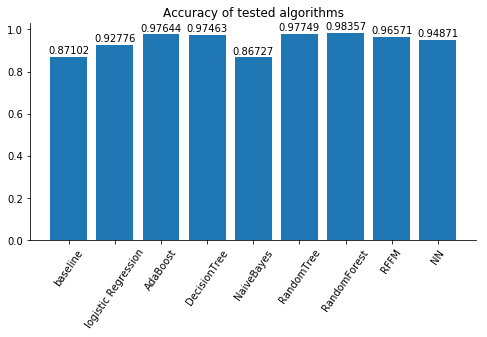

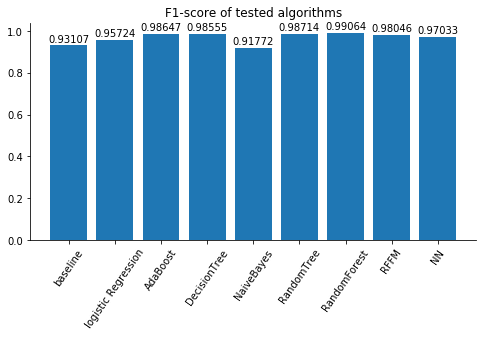

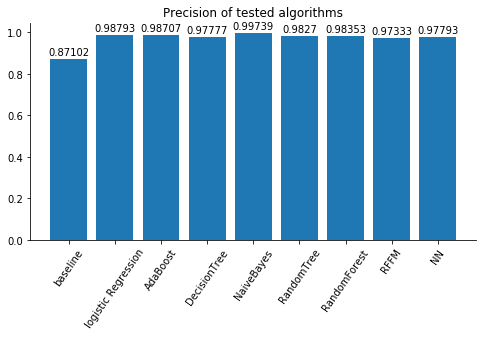

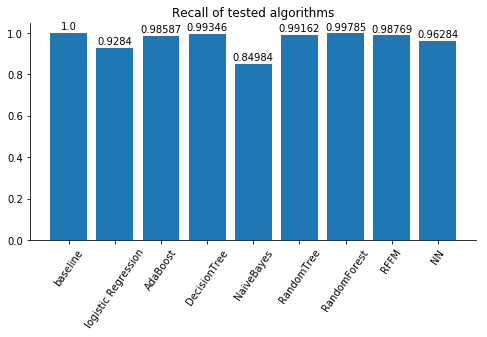

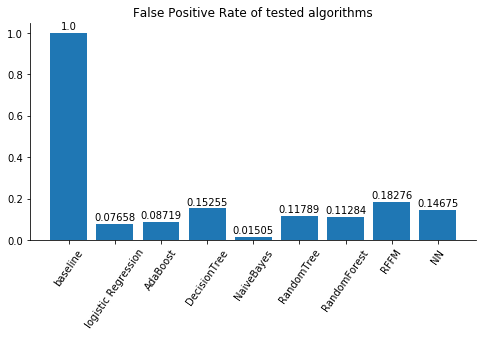

In [65]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Results comparison

In [85]:
y_pred = {}

In [86]:
y_pred["RFFM"] = class_id
y_pred["NN"] = y_pred_NN

In [87]:
# Metrics of baseline method

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred["baseline"] = np.ones(len(y_test)).ravel() 
else:
    y_pred["baseline"] = np.zeros(len(y_test)).ravel()
        
y_pred["baseline"] = y_pred["baseline"].astype(int)

In [88]:
classifiers = {
               "AdaBoost":make_pipeline(StandardScaler(), AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees)),
               "DecisionTree":make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0)),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=196, max_depth=40, random_state=0),
              }

name = "LogisticReg"
model = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
y_pred[name] = model.predict(X_test)

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred[name] = model.predict(X_test)

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to floa

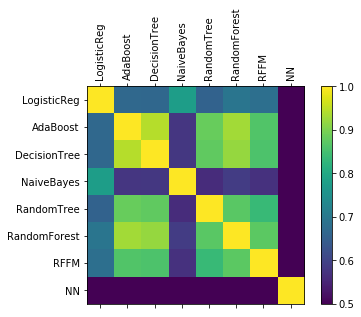

In [89]:
y_pred_pand = pd.DataFrame.from_dict(y_pred)
names = ["LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "NN"]
correlations = y_pred_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0.5, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [90]:
print(correlations)

              LogisticReg  AdaBoost  DecisionTree  NaiveBayes  RandomTree  \
LogisticReg      1.000000  0.669884      0.666939    0.777411    0.657883   
AdaBoost         0.669884  1.000000      0.943388    0.578142    0.883861   
DecisionTree     0.666939  0.943388      1.000000    0.580287    0.878824   
NaiveBayes       0.777411  0.578142      0.580287    1.000000    0.563201   
RandomTree       0.657883  0.883861      0.878824    0.563201    1.000000   
RandomForest     0.694794  0.931021      0.921465    0.589097    0.872309   
RFFM             0.682167  0.864484      0.859869    0.571478    0.836742   
NN               0.001935  0.003341      0.002733   -0.003472    0.004074   

              RandomForest      RFFM        NN  
LogisticReg       0.694794  0.682167  0.001935  
AdaBoost          0.931021  0.864484  0.003341  
DecisionTree      0.921465  0.859869  0.002733  
NaiveBayes        0.589097  0.571478 -0.003472  
RandomTree        0.872309  0.836742  0.004074  
RandomForest

In [91]:
failures = {}
failures["baseline"] = []
failures["LogisticReg"] = []
failures["AdaBoost"] = []
failures["DecisionTree"] = []
failures["NaiveBayes"] = []
failures["RandomTree"] = []
failures["RandomForest"] = []
failures["RFFM"] = []
failures["NN"] = []

for i in range(0, len(y_test)):
    for key in y_pred.keys():
        if y_pred[key][i] != y_test[i]:
            failures[key].append(10)
        else:
            failures[key].append(1)

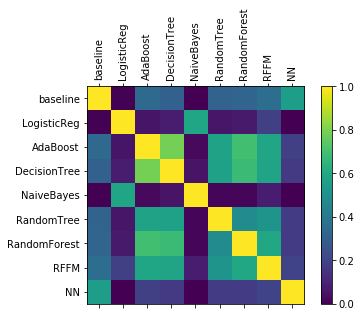

In [92]:
failures_pand = pd.DataFrame.from_dict(failures)
names = ["baseline", "LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "NN"]
#names = ["baseline", "LogisticReg", "RandomForest"]
correlations = failures_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [93]:
print(correlations)

              baseline  LogisticReg  AdaBoost  DecisionTree  NaiveBayes  \
baseline      1.000000     0.007562  0.342669      0.309484   -0.140108   
LogisticReg   0.007562     1.000000  0.057183      0.078383    0.593227   
AdaBoost      0.342669     0.057183  1.000000      0.789517    0.024087   
DecisionTree  0.309484     0.078383  0.789517      1.000000    0.053839   
NaiveBayes   -0.140108     0.593227  0.024087      0.053839    1.000000   
RandomTree    0.317608     0.059444  0.574354      0.572743    0.016097   
RandomForest  0.326469     0.074044  0.699164      0.682263    0.014542   
RFFM          0.361288     0.189538  0.590170      0.582391    0.075657   
NN            0.557009     0.002356  0.189645      0.170371   -0.084750   

              RandomTree  RandomForest      RFFM        NN  
baseline        0.317608      0.326469  0.361288  0.557009  
LogisticReg     0.059444      0.074044  0.189538  0.002356  
AdaBoost        0.574354      0.699164  0.590170  0.189645  
Decis

In [94]:
cont_table = [[],[]]
for name in failures.keys():
    print(Counter(failures[name]))
    cont_table[0].append(float(Counter(failures[name])[1]))
    cont_table[1].append(float(Counter(failures[name])[10]))
print(cont_table)

Counter({1: 54763, 10: 8109})
Counter({1: 58323, 10: 4549})
Counter({1: 61233, 10: 1639})
Counter({1: 61019, 10: 1853})
Counter({1: 53943, 10: 8929})
Counter({1: 60974, 10: 1898})
Counter({1: 61635, 10: 1237})
Counter({1: 60394, 10: 2478})
Counter({1: 48046, 10: 14826})
[[54763.0, 58323.0, 61233.0, 61019.0, 53943.0, 60974.0, 61635.0, 60394.0, 48046.0], [8109.0, 4549.0, 1639.0, 1853.0, 8929.0, 1898.0, 1237.0, 2478.0, 14826.0]]


In [95]:
from scipy import stats

# test of independence
# H0 : results are independent

stat, p, dof, expected = stats.chi2_contingency(cont_table)
stats.chi2_contingency(cont_table)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('\nreject H0 - results dependent')
else:
    print('\nfailed to reject H0 - results independent')

probability=0.950, critical=15.507, stat=37235.084

reject H0 - results dependent


## New data prediction

In [96]:
test_set = pd.read_csv("20151221.txt", sep = "\t", header = None)
test_set.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(test_set["attack_flag"]))

Counter({-1: 210159, 1: 2830})


In [97]:
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-2, -1)
test_set.loc[:, "attack_flag"] = test_set.loc[:, "attack_flag"] * -1
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(test_set["attack_flag"]))

Counter({1: 210159, 0: 2830})


In [98]:
# slice dataset, drop additional features
print(test_set.shape)
test_set = test_set.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(test_set.shape)

# drop software markers
test_set = test_set.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_set["attack_flag"].value_counts()

(212989, 24)
(212989, 21)


1    210159
0      2830
Name: attack_flag, dtype: int64

In [99]:
# removing NaNs
test_set = test_set.dropna()
test_set.shape

(212989, 18)

In [100]:
test_set["well-known src pool"] = test_set.apply(wk, axis=1)
test_set["registered src pool"] = test_set.apply(reg, axis=1)
test_set["cli src pool"] = test_set.apply(cli, axis=1)

In [101]:
test_set["src port"] = test_set["src port"].apply(str)
test_set["dst port"] = test_set["dst port"].apply(str)
test_set['src port'].nunique()
test_set['dst port'].nunique()

thresh1 = 125
thresh2 = 125
counts1 = test_set['src port'].value_counts()
counts2 = test_set['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [102]:
### hot one encoding ###

# hot one encoding for service
test_set = pd.concat([test_set, pd.get_dummies(test_set["service"], prefix="is")], axis=1)
test_set.tail(10)

#hot one encoding for proto - commented due to reduced column number
test_set = pd.concat([test_set, pd.get_dummies(test_set["proto"], prefix="is")], axis=1)
test_set.tail(10)

# hot one encoding for conn state
test_set = pd.concat([test_set, pd.get_dummies(test_set["Conn state"], prefix="state")], axis=1)
test_set.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_OTH,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SHR
212979,0.000061,other,0,0,20,1.0,0.05,0.15,2,85,...,0,1,0,0,0,0,0,0,0,0
212980,0.000000,other,0,0,1,1.0,0.00,0.22,4,6,...,0,0,0,0,0,0,1,0,0,0
212981,0.000013,other,0,0,13,1.0,0.08,0.26,6,84,...,0,1,0,0,0,0,0,0,0,0
212982,0.000029,other,0,0,2,1.0,0.50,0.25,1,6,...,0,1,0,0,0,0,0,0,0,0
212983,0.000039,other,0,0,14,1.0,0.07,0.24,1,84,...,0,1,0,0,0,0,0,0,0,0
212984,0.000045,other,0,0,15,1.0,0.07,0.23,3,84,...,0,1,0,0,0,0,0,0,0,0
212985,0.000053,other,0,0,16,1.0,0.06,0.22,19,84,...,0,1,0,0,0,0,0,0,0,0
212986,0.000056,other,0,0,17,1.0,0.06,0.21,7,84,...,0,1,0,0,0,0,0,0,0,0
212987,0.000058,other,0,0,18,1.0,0.06,0.20,20,84,...,0,1,0,0,0,0,0,0,0,0
212988,0.000110,dns,36,194,1,1.0,0.00,0.50,0,89,...,0,0,0,0,0,0,0,0,1,0


In [103]:
test_set.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

In [104]:
# check differences between datasets after hot one encoding

# print(train_data.columns.difference(test_data.columns)[0])
# columns that are not in test but are in train
test_new_data_full = test_set

# for c in data.columns.difference(test_set.columns):
#     test_set[c] = 0
# for c in test_set.columns.difference(data.columns):
#     test_set = test_set.drop(c, axis=1)
    
print(test_set.columns.difference(data.columns))  
test_set.shape

Index(['is_dst_102', 'is_dst_119', 'is_dst_143', 'is_dst_223', 'is_dst_389',
       'is_dst_5432', 'is_dst_6050', 'is_dst_631', 'is_dst_88', 'is_dst_9080',
       'is_src_13941', 'is_src_18382', 'is_src_21320', 'is_src_22055',
       'is_src_2295', 'is_src_29174', 'is_src_300', 'is_src_37286',
       'is_src_37396', 'is_src_37511', 'is_src_38396', 'is_src_40082',
       'is_src_40718', 'is_src_41161', 'is_src_41287', 'is_src_41708',
       'is_src_41793', 'is_src_42206', 'is_src_443', 'is_src_4445',
       'is_src_46432', 'is_src_49354', 'is_src_49362', 'is_src_49376',
       'is_src_49414', 'is_src_5061', 'is_src_5071', 'is_src_5094',
       'is_src_5100', 'is_src_5114', 'is_src_51361', 'is_src_5208',
       'is_src_5211', 'is_src_52131', 'is_src_5229', 'is_src_5247',
       'is_src_53265', 'is_src_53451', 'is_src_53762', 'is_src_54110',
       'is_src_54334', 'is_src_54499', 'is_src_54509', 'is_src_5501',
       'is_src_56118', 'is_src_5844', 'is_src_58663', 'is_src_60000',
       'i

(212989, 193)

In [109]:
test_new_data = test_set.loc[range(30000), :]

for c in data.columns.difference(test_new_data.columns):
    test_new_data[c] = 0
for c in test_new_data.columns.difference(data.columns):
    test_new_data = test_new_data.drop(c, axis=1)

test_new_data = test_new_data.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
    
test_new_data = test_new_data.sample(frac=1)
y_test_new_data = test_new_data.loc[:, "attack_flag"].values.ravel()
X_test_new_data = test_new_data.drop(["attack_flag"], axis=1).astype(np.float32)

In [110]:
print(X_test_new_data.shape)
print(X_test.shape)
print(test_new_data["attack_flag"].value_counts())

(30000, 354)
(62872, 354)
1    29498
0      502
Name: attack_flag, dtype: int64


In [111]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test_new_data.mean() > (1-y_test_new_data.mean())):
    y_pred = np.ones(len(y_test_new_data)).ravel() 
else:
    y_pred = np.zeros(len(y_test_new_data)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.98327, F1-score: 0.99156, Precision: 0.98327, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 502; FN:    0; TP: 29498



In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test_new_data)

name = "logistic Regression"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.97377, F1-score: 0.98671, Precision: 0.98311, Recall: 0.99034, FPR: 1.00000
TN:   0; FP: 502; FN:  285; TP: 29213



In [113]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


seed = 12
num_trees = 28

classifiers = {
               "AdaBoost":make_pipeline(StandardScaler(), AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees)),
               "DecisionTree":make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0)),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest": RandomForestClassifier(n_estimators=196, max_depth=40, random_state=0),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test_new_data)
    
    Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
    F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
    Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
    Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: AdaBoost     Accuracy: 0.98427, F1-score: 0.99201, Precision: 0.99100, Recall: 0.99302, FPR: 0.52988
TN: 236; FP: 266; FN:  206; TP: 29292



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: DecisionTree Accuracy: 0.58603, F1-score: 0.73793, Precision: 0.97731, Recall: 0.59275, FPR: 0.80876
TN:  96; FP: 406; FN: 12013; TP: 17485

Algorithm: NaiveBayes   Accuracy: 0.98260, F1-score: 0.99122, Precision: 0.98326, Recall: 0.99932, FPR: 1.00000
TN:   0; FP: 502; FN:   20; TP: 29478

Algorithm: RandomTree   Accuracy: 0.53397, F1-score: 0.69530, Precision: 0.97345, Recall: 0.54078, FPR: 0.86653
TN:  67; FP: 435; FN: 13546; TP: 15952

Algorithm: RandomForest Accuracy: 0.98327, F1-score: 0.99156, Precision: 0.98327, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 502; FN:    0; TP: 29498



In [114]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test_new_data.values},
    y=y_test_new_data,
    batch_size=X_test_new_data.shape[0],
    num_epochs=1,
    shuffle=False)

In [115]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [116]:
class_id = []

for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [117]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test_new_data, class_id)
F1S[name] = metrics.f1_score(y_test_new_data, class_id)
Prec[name] = metrics.precision_score(y_test_new_data, class_id)
Rec[name] = metrics.recall_score(y_test_new_data, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, class_id).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

RFFM Accuracy: 0.99073, F1-score: 0.99530, Precision: 0.99175, Recall: 0.99888, FPR: 0.48805
TN: 257; FP: 245; FN:   33; TP: 29465



In [135]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_new_data_full.loc[range(30000), :], num_epochs=1, n_batch = X_test.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [136]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])
len(y_pred)

30000

In [137]:
name = "NN"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

NN Accuracy: 0.96723, F1-score: 0.98334, Precision: 0.98322, Recall: 0.98346, FPR: 0.98606
TN:   7; FP: 495; FN:  488; TP: 29010



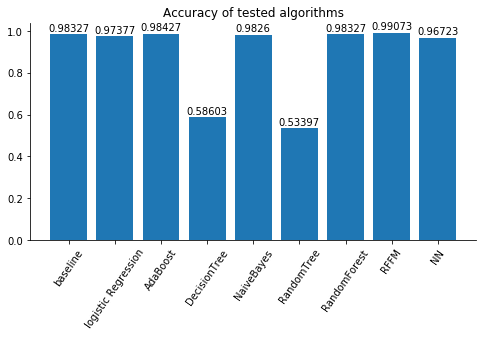

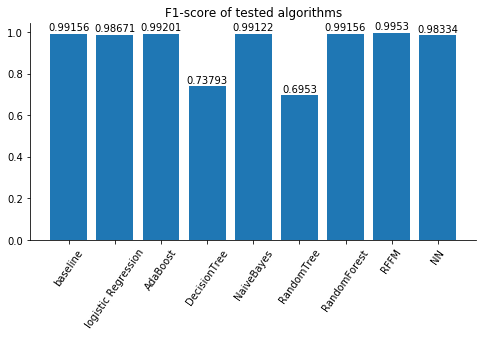

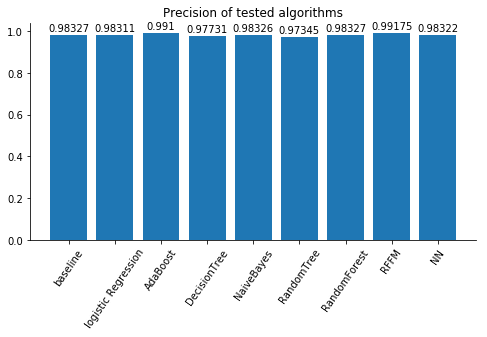

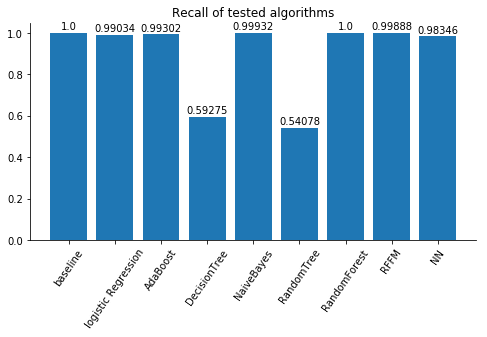

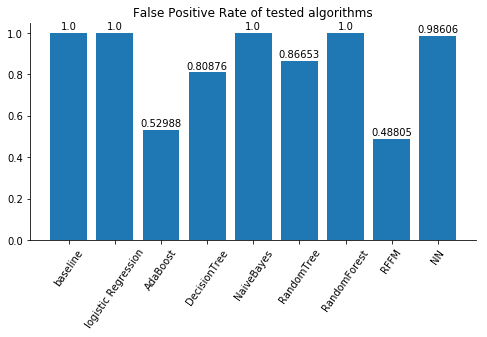

In [138]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)